In [19]:
import pandas as pd 
import numpy as np 
%matplotlib inline

In [2]:
master_df = pd.read_csv('C:/Users/Shoya/surf/data/master_df_v3.csv', encoding='latin1')
master_df.head()

,Unnamed: 0,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Date(UTC),...,Close Price % Change,Close Price % Change (Abs),Is Price Anomaly (Bitmap Detector),Is Price Anomaly (Derivative Detector),Is Price % Change Anomaly (Bitmap Detector),Is Trend Anomaly (Bitmap Detector),Moving Average Price,Moving Average Price % Change,MA % Change (Abs.Value),Is Spike
0,0,1420840800,289.59,289.94,289.13,289.13,34.042422,9854.490388,289.476771,2015-01-09 22:00:00,...,NaN,NaN,0,0,0,0,NaN,NaN,NaN,0
1,1,1420844400,293.61,293.61,292.15,292.15,36.628012,10733.474260,293.040042,2015-01-09 23:00:00,...,0.010445,0.010445,0,0,0,0,NaN,NaN,NaN,1
2,2,1420848000,293.89,293.89,293.89,293.89,0.158015,46.439149,293.890000,2015-01-10 00:00:00,...,0.005956,0.005956,0,0,0,0,291.723333,NaN,NaN,1
3,3,1420851600,289.20,289.20,289.10,289.10,30.985828,8960.344674,289.175573,2015-01-10 01:00:00,...,-0.016299,0.016299,0,0,0,0,291.713333,-0.000034,0.000034,-1
4,4,1420855200,289.18,289.18,288.57,288.59,7.694195,2224.105007,289.062740,2015-01-10 02:00:00,...,-0.001764,0.001764,0,0,0,0,290.526667,-0.004068,0.004068,0


In [47]:
master_df.dropna(inplace=True)

master_df["Bitcoin (Adj.Overlap)"].loc[master_df["Bitcoin (Adj.Overlap)"] == 0.000000] = 0.000001

#master_df["Close"].loc[granger_df["Bitcoin (Adj.Overlap)"] == 0.000000] = 0.000001


master_df["Bitcoin Trend % Change"] = pd.Series(np.diff(np.log(master_df["Bitcoin (Adj.Overlap)"])))
#master_df["Bitcoin Trend % Change"] = master_df["Bitcoin (Adj.Overlap)"].pct_change() 
master_df["Bitcoin Trend % Change"].loc[master_df["Bitcoin Trend % Change"] == 0.000000] = 0.000001

master_df["Bitcoin Trend % Change (Abs)"] = abs(master_df["Bitcoin Trend % Change"])


master_df["Bitcoin Price % Change"] = pd.Series(np.diff(np.log(master_df["Close"])))
#master_df["Bitcoin Price % Change"] = master_df["Close"].pct_change() 
master_df["Bitcoin Price % Change"].loc[master_df["Bitcoin Price % Change"] == 0.000000] = 0.000001
master_df["Bitcoin Price % Change (Abs)"] = abs(master_df["Bitcoin Price % Change"])

master_df.dropna(inplace=True)

master_df[["Bitcoin (Adj.Overlap)", "Bitcoin Trend % Change",  "Bitcoin Trend % Change (Abs)", "Close", "Bitcoin Price % Change", "Bitcoin Price % Change (Abs)"]].head()

C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Bitcoin (Adj.Overlap),Bitcoin Trend % Change,Bitcoin Trend % Change (Abs),Close,Bitcoin Price % Change,Bitcoin Price % Change (Abs)
6,62.0,-0.185717,0.185717,288.37,0.001680,0.001680
7,60.0,-0.041673,0.041673,290.27,0.001071,0.001071
8,57.0,-0.088947,0.088947,288.62,-0.008165,0.008165
9,59.0,-0.023530,0.023530,286.70,-0.003747,0.003747
10,59.0,0.068993,0.068993,285.80,0.001623,0.001623


C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Sat, 25, Aug, 2018
Time:                     17:50:20
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -14.5092
Nobs:                     30187.0    HQIC:                  -14.5205
Log likelihood:           133638.    FPE:                4.91514e-07
AIC:                     -14.5258    Det(Omega_mle):     4.90538e-07
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change         -0.052884         0.005758           -9.184           0.000
L1.Bitcoin Trend % Change         -0.000373         0.000652           -0.572        

Granger Causality: Google Trend -> Close
Granger causality F-test. H_0: Bitcoin Trend % Change does not Granger-cause Bitcoin Price % Change. Conclusion: fail to reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
    0.3825         1.667       0.984  (15, 60314)
-------------------------------------------------
Granger Causality: Close -> Google Trend
Granger causality F-test. H_0: Bitcoin Price % Change does not Granger-cause Bitcoin Trend % Change. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
    8.603          1.667       0.000  (15, 60314)
-------------------------------------------------


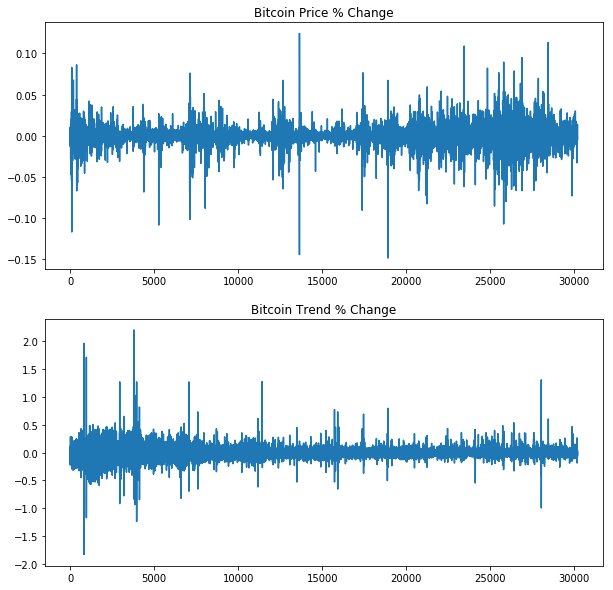

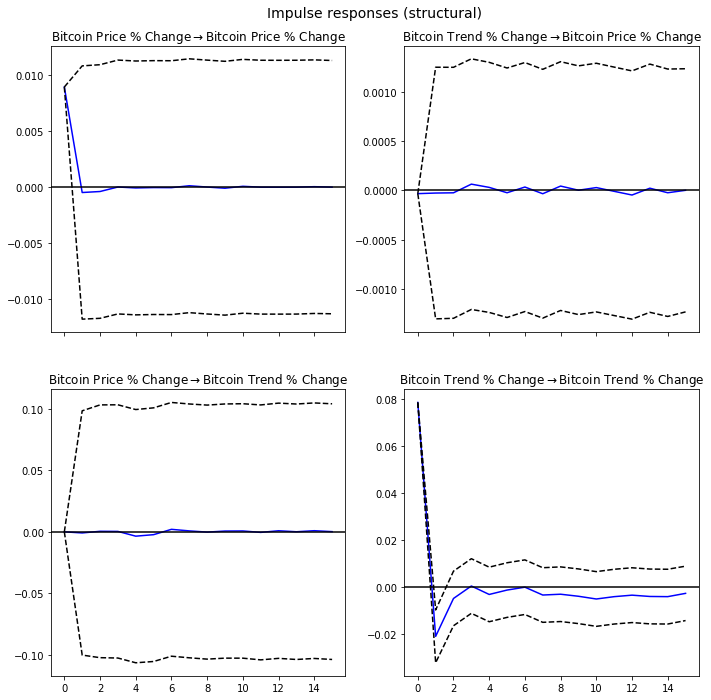

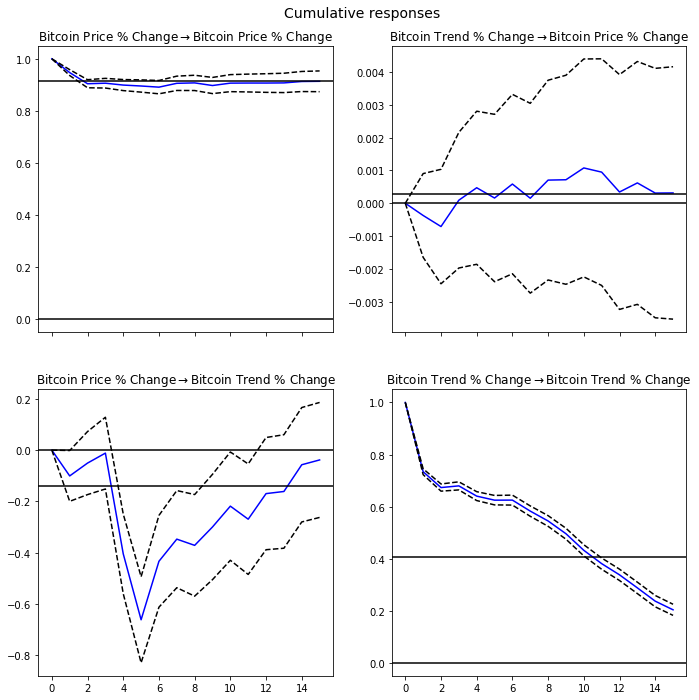

In [48]:
# Test Granger Causality 

from statsmodels.tsa.api import SVAR 
from matplotlib import pyplot as plt

A = np.array([[ 1, 'E'],
              [ 0 , 1 ]])

B = np.array([['E',0], 
              [0, 'E']])

SVAR_model = SVAR(master_df[["Bitcoin Price % Change","Bitcoin Trend % Change"]], svar_type='AB', A=A, B=B)
result_SVAR = SVAR_model.fit(verbose=True, trend='nc', maxlags=15) # 71 somehow causes the smallest p-value
display(result_SVAR.summary())


SVAR_granger_result = result_SVAR.test_causality(caused="Bitcoin Price % Change", causing="Bitcoin Trend % Change", kind='f')
print('Granger Causality: Google Trend -> Close')
print(SVAR_granger_result.summary())

# Test if Prices Granger Causes Trend 
SVAR_granger_result_2 = result_SVAR.test_causality(caused="Bitcoin Trend % Change", causing="Bitcoin Price % Change", kind='f')
print('Granger Causality: Close -> Google Trend')
print(SVAR_granger_result_2.summary())


result_SVAR.plot();
SVAR_irf = result_SVAR.irf(periods=15)
SVAR_irf.plot();
SVAR_irf.plot_cum_effects();



C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Sat, 25, Aug, 2018
Time:                     17:52:18
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.2100
Nobs:                     30187.0    HQIC:                  -15.2213
Log likelihood:           144215.    FPE:                2.43888e-07
AIC:                     -15.2266    Det(Omega_mle):     2.43404e-07
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change (Abs)
                                      coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change (Abs)          0.135568         0.005749           23.579           0.000
L1.Bitcoin Trend % Change                0.000018         0.0

Granger Causality: Google Trend -> Close
Granger causality F-test. H_0: Bitcoin Trend % Change does not Granger-cause Bitcoin Price % Change (Abs). Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
    2.121          1.667       0.007  (15, 60314)
-------------------------------------------------
Granger Causality: Close -> Google Trend
Granger causality F-test. H_0: Bitcoin Price % Change (Abs) does not Granger-cause Bitcoin Trend % Change. Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value      df    
-------------------------------------------------
    43.91          1.667       0.000  (15, 60314)
-------------------------------------------------


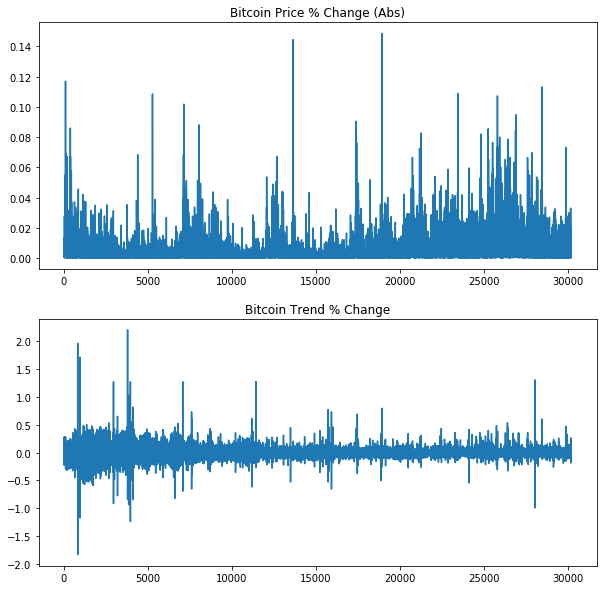

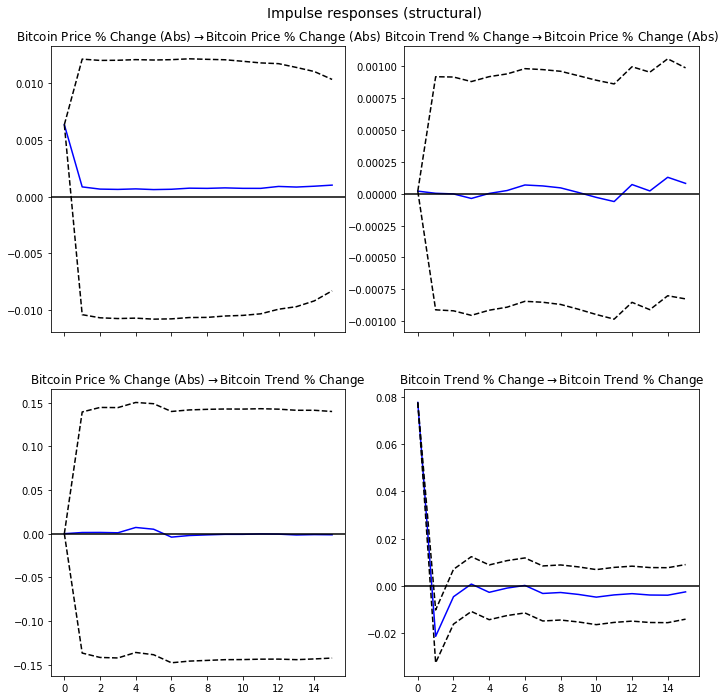

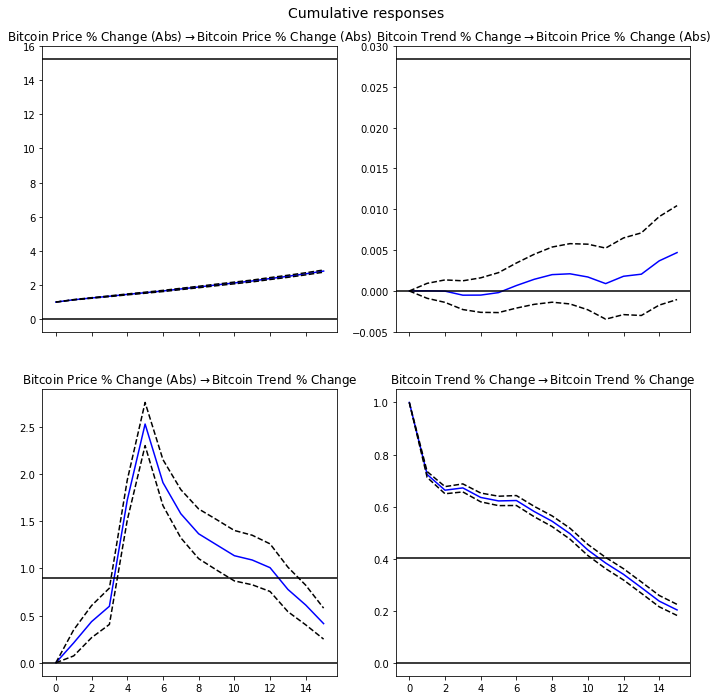

In [51]:
# Test Granger Causality 

SVAR_model = SVAR(master_df[["Bitcoin Price % Change (Abs)","Bitcoin Trend % Change"]], svar_type='AB', A=A, B=B)
result_SVAR = SVAR_model.fit(verbose=True, trend='nc', maxlags=15)
display(result_SVAR.summary())


SVAR_granger_result = result_SVAR.test_causality(caused="Bitcoin Price % Change (Abs)", causing="Bitcoin Trend % Change", kind='f')
print('Granger Causality: Google Trend -> Close')
print(SVAR_granger_result.summary())

# Test if Prices Granger Causes Trend 
SVAR_granger_result_2 = result_SVAR.test_causality(caused="Bitcoin Trend % Change", causing="Bitcoin Price % Change (Abs)", kind='f')
print('Granger Causality: Close -> Google Trend')
print(SVAR_granger_result_2.summary())


result_SVAR.plot();
SVAR_irf = result_SVAR.irf(periods=15)
SVAR_irf.plot();
SVAR_irf.plot_cum_effects();



C:\Users\Shoya\Anaconda2\envs\tensorflow\lib\site-packages\statsmodels\tsa\base\tsa_model.py:221: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                        SVAR
Method:                        OLS
Date:           Sat, 25, Aug, 2018
Time:                     17:53:35
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -15.5993
Nobs:                     30197.0    HQIC:                  -15.6030
Log likelihood:           149933.    FPE:                1.67082e-07
AIC:                     -15.6048    Det(Omega_mle):     1.66971e-07
--------------------------------------------------------------------
Results for equation Bitcoin Price % Change (Abs)
                                     coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------------------
L1.Bitcoin Price % Change (Abs)         0.204163         0.005701           35.814           0.000
L1.Bitcoin Trend % Change (Abs)         0.001545         0.00060

Granger Causality: Google Trend -> Close
Granger causality F-test. H_0: Bitcoin Trend % Change (Abs) does not Granger-cause Bitcoin Price % Change (Abs). Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
    71.62          2.214       0.000  (5, 60374)
------------------------------------------------
Granger Causality: Close -> Google Trend
Granger causality F-test. H_0: Bitcoin Price % Change (Abs) does not Granger-cause Bitcoin Trend % Change (Abs). Conclusion: reject H_0 at 5% significance level.
Test statistic Critical value p-value     df    
------------------------------------------------
    174.1          2.214       0.000  (5, 60374)
------------------------------------------------


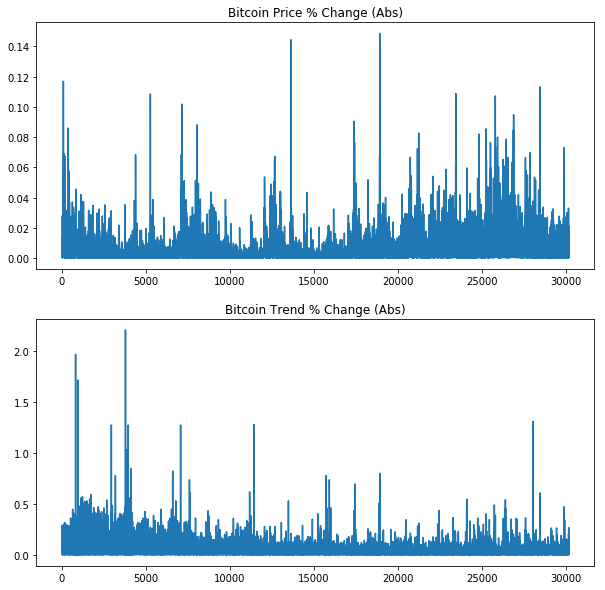

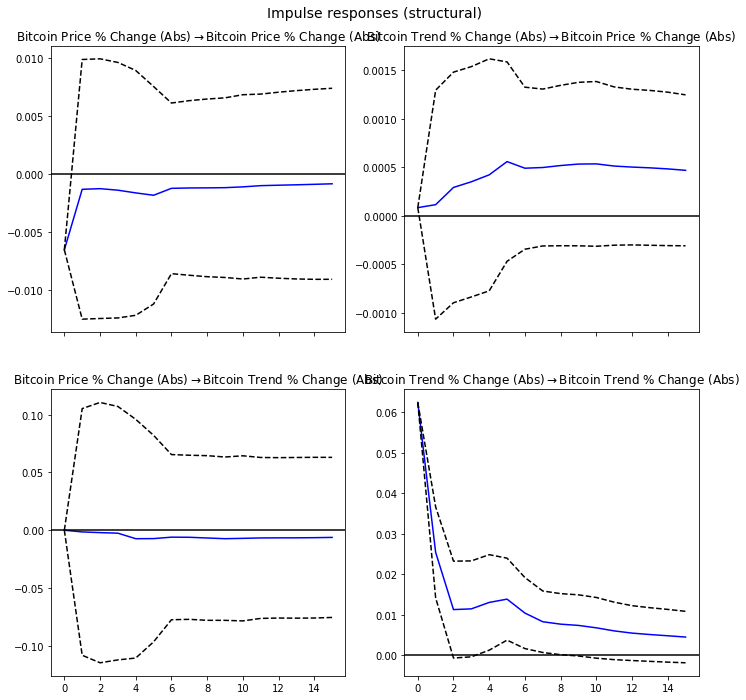

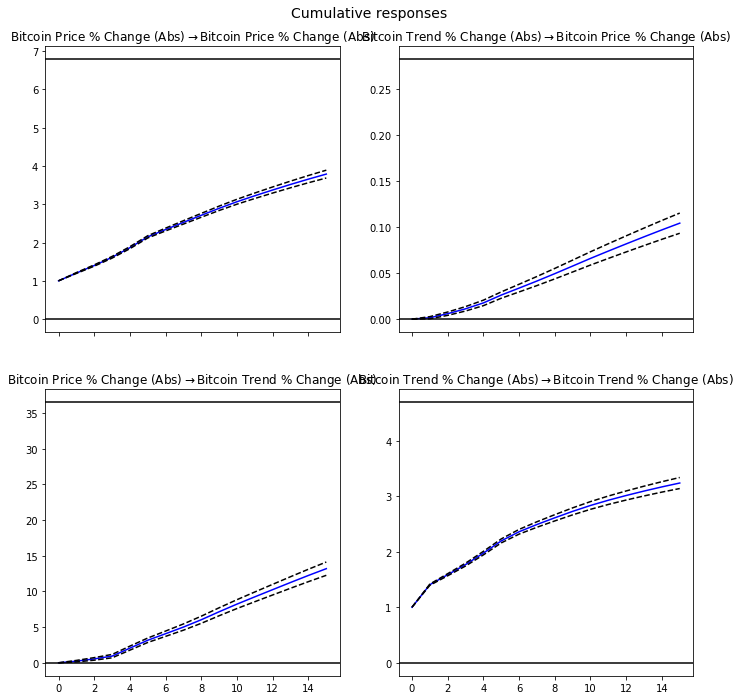

In [54]:
# Test Granger Causality 

SVAR_model = SVAR(master_df[["Bitcoin Price % Change (Abs)","Bitcoin Trend % Change (Abs)"]], svar_type='AB', A=A, B=B)
result_SVAR = SVAR_model.fit(verbose=True, trend='nc', maxlags=5)
display(result_SVAR.summary())


SVAR_granger_result = result_SVAR.test_causality(caused="Bitcoin Price % Change (Abs)", causing="Bitcoin Trend % Change (Abs)", kind='f')
print('Granger Causality: Google Trend -> Close')
print(SVAR_granger_result.summary())

# Test if Prices Granger Causes Trend 
SVAR_granger_result_2 = result_SVAR.test_causality(caused="Bitcoin Trend % Change (Abs)", causing="Bitcoin Price % Change (Abs)", kind='f')
print('Granger Causality: Close -> Google Trend')
print(SVAR_granger_result_2.summary())


result_SVAR.plot();
SVAR_irf = result_SVAR.irf(periods=15)
SVAR_irf.plot();
SVAR_irf.plot_cum_effects();

